In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
# load the datasets using pandas
data = pd.read_csv("spam.csv" , encoding='latin-1')

In [ ]:
data

,Class,Text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


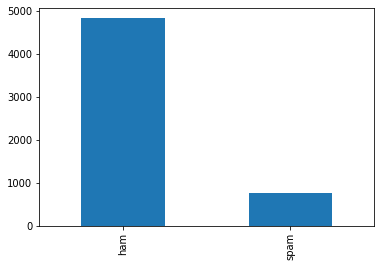

In [ ]:
data.Class.value_counts().plot.bar();

In [ ]:
# Implementing Lable Encoding for three features 
from sklearn import preprocessing
LabEnc = preprocessing.LabelEncoder()
data['Class'] = LabEnc.fit_transform(data['Class'])

In [ ]:
dataset = data[['Class', 'Text']]

In [ ]:
dataset

,Class,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


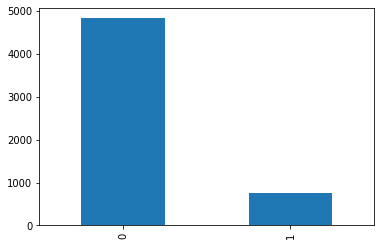

In [ ]:
data.Class.value_counts().plot.bar();

In [ ]:
dataset['text_len'] = dataset['Text'].apply(len)
dataset.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Class,Text,text_len
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import string
from nltk.corpus import stopwords

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

In [ ]:
dataset['clean_msg'] = dataset.Text.apply(text_process)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dataset

,Class,Text,text_len,clean_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,Go jurong point crazy Available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,Ok lar Joking wif oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,Free entry wkly comp win FA Cup final tkts 21s...
3,0,U dun say so early hor... U c already then say...,49,dun say early hor c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,Nah think goes usf lives around though
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,2nd time tried contact å£750 Pound prize claim...
5568,0,Will Ì_ b going to esplanade fr home?,37,Ì b going esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,Pity mood Soany suggestions
5570,0,The guy did some bitching but I acted like i'd...,125,guy bitching acted like id interested buying s...


In [ ]:
dataset['clean_msg_len'] = dataset['clean_msg'].apply(len)
dataset.head()

,Class,Text,text_len,clean_msg,clean_msg_len
0,0,"Go until jurong point, crazy.. Available only ...",111,Go jurong point crazy Available bugis n great ...,82
1,0,Ok lar... Joking wif u oni...,29,Ok lar Joking wif oni,21
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,Free entry wkly comp win FA Cup final tkts 21s...,133
3,0,U dun say so early hor... U c already then say...,49,dun say early hor c already say,31
4,0,"Nah I don't think he goes to usf, he lives aro...",61,Nah think goes usf lives around though,38


In [ ]:
datas = [dataset['Class'] , dataset['clean_msg']]
headers = ['Class', 'Text']

In [ ]:
df = pd.concat(datas, axis = 1, keys=headers)

In [ ]:
df.head()

,Class,Text
0,0,Go jurong point crazy Available bugis n great ...
1,0,Ok lar Joking wif oni
2,1,Free entry wkly comp win FA Cup final tkts 21s...
3,0,dun say early hor c already say
4,0,Nah think goes usf lives around though


In [ ]:
vect = CountVectorizer()

In [ ]:
df1 = vect.fit_transform(df.Text)

In [ ]:
df1.shape

(5572, 9371)

In [ ]:
vect.vocabulary_

{'go': 3762,
 'jurong': 4649,
 'point': 6378,
 'crazy': 2482,
 'available': 1401,
 'bugis': 1864,
 'great': 3859,
 'world': 9102,
 'la': 4806,
 'buffet': 1862,
 'cine': 2198,
 'got': 3819,
 'amore': 1168,
 'wat': 8866,
 'ok': 5943,
 'lar': 4845,
 'joking': 4617,
 'wif': 8998,
 'oni': 5975,
 'free': 3554,
 'entry': 3139,
 'wkly': 9054,
 'comp': 2314,
 'win': 9012,
 'fa': 3276,
 'cup': 2537,
 'final': 3400,
 'tkts': 8311,
 '21st': 453,
 'may': 5291,
 '2005': 440,
 'text': 8150,
 '87121': 865,
 'receive': 6774,
 'questionstd': 6666,
 'txt': 8518,
 'ratetcs': 6718,
 'apply': 1254,
 '08452810075over18s': 71,
 'dun': 2991,
 'say': 7129,
 'early': 3011,
 'hor': 4187,
 'already': 1142,
 'nah': 5634,
 'think': 8224,
 'goes': 3776,
 'usf': 8662,
 'lives': 5007,
 'around': 1305,
 'though': 8243,
 'freemsg': 3562,
 'hey': 4083,
 'darling': 2601,
 'weeks': 8920,
 'word': 9088,
 'back': 1451,
 'id': 4306,
 'like': 4957,
 'fun': 3625,
 'still': 7793,
 'tb': 8080,
 'xxx': 9227,
 'std': 7768,
 'chgs': 

In [ ]:
df1

<5572x9371 sparse matrix of type '<class 'numpy.int64'>'
	with 46258 stored elements in Compressed Sparse Row format>

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df1,df['Class'],test_size=0.2)

In [ ]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
predicted = clf.predict(X_test)

In [ ]:
score = metrics.accuracy_score(y_test, predicted)
print(score)

0.9757847533632287


In [ ]:
from sklearn import svm
clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = clf2.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9820627802690582


In [ ]:
from sklearn import svm
clf3 = svm.SVC(kernel='poly')
clf3.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = clf3.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9408071748878923


In [ ]:
from sklearn import svm
clf4 = svm.SVC(kernel='sigmoid')
clf4.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = clf4.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9802690582959641
